## Data Preprocessing

In [2]:
import pandas as pd

# Load the dataset to examine its structure and contents
file_path = 'Annual GDP.csv'
gdp_data = pd.read_csv(file_path)

# Display the first few rows and general info about the dataset
gdp_data.head(), gdp_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              24 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  24 non-null     object 
 2   Annual GDP growth (%)             24 non-null     float64
 3   Real GDP prices (Ksh Million)     24 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 900.0+ bytes


(   Year Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
 0  2023                       15,108,806                    5.6   
 1  2022                       13,489,642                    4.9   
 2  2021                       12,027,662                    7.6   
 3  2020                       10,715,070                   -0.3   
 4  2019                       10,237,727                    5.1   
 
   Real GDP prices (Ksh Million)  
 0                    10,399,980  
 1                     9,852,583  
 2                     9,395,942  
 3                     8,733,060  
 4                     8,756,946  ,
 None)

In [4]:
# Remove commas and convert the GDP columns to numeric types
gdp_data['Nominal GDP prices (Ksh Million)'] = gdp_data['Nominal GDP prices (Ksh Million)'].str.replace(',', '').astype(float)
gdp_data['Real GDP prices (Ksh Million)'] = gdp_data['Real GDP prices (Ksh Million)'].str.replace(',', '').astype(float)

# Confirm changes by displaying the updated data types and first few rows
gdp_data.head(), gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              24 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  24 non-null     float64
 2   Annual GDP growth (%)             24 non-null     float64
 3   Real GDP prices (Ksh Million)     24 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 900.0 bytes


(   Year  Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
 0  2023                        15108806.0                    5.6   
 1  2022                        13489642.0                    4.9   
 2  2021                        12027662.0                    7.6   
 3  2020                        10715070.0                   -0.3   
 4  2019                        10237727.0                    5.1   
 
    Real GDP prices (Ksh Million)  
 0                     10399980.0  
 1                      9852583.0  
 2                      9395942.0  
 3                      8733060.0  
 4                      8756946.0  ,
 None)

## visualizing trends in GDP over time

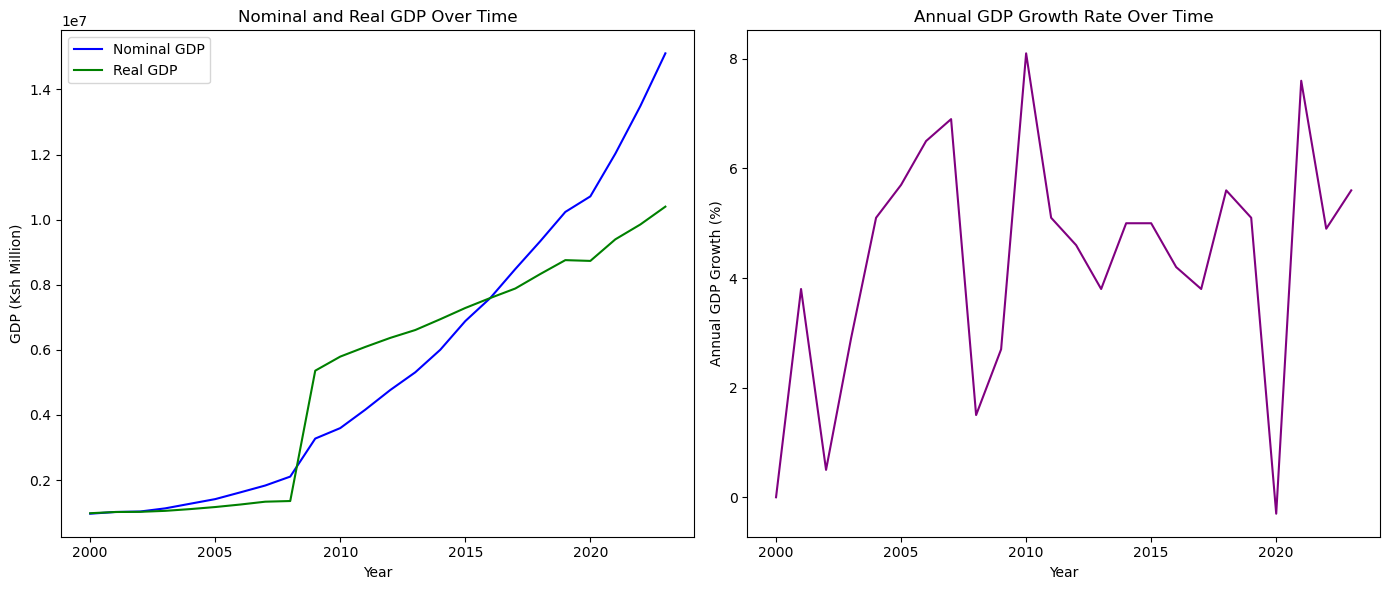

In [7]:
import matplotlib.pyplot as plt

# Set up the figure and axes for multiple plots
plt.figure(figsize=(14, 6))

# Plot Nominal and Real GDP over time
plt.subplot(1, 2, 1)
plt.plot(gdp_data['Year'], gdp_data['Nominal GDP prices (Ksh Million)'], label="Nominal GDP", color="blue")
plt.plot(gdp_data['Year'], gdp_data['Real GDP prices (Ksh Million)'], label="Real GDP", color="green")
plt.xlabel("Year")
plt.ylabel("GDP (Ksh Million)")
plt.title("Nominal and Real GDP Over Time")
plt.legend()

# Plot Annual GDP growth rate over time
plt.subplot(1, 2, 2)
plt.plot(gdp_data['Year'], gdp_data['Annual GDP growth (%)'], color="purple")
plt.xlabel("Year")
plt.ylabel("Annual GDP Growth (%)")
plt.title("Annual GDP Growth Rate Over Time")

plt.tight_layout()
plt.show()

## Enhanced GDP Growth Rate Analysis

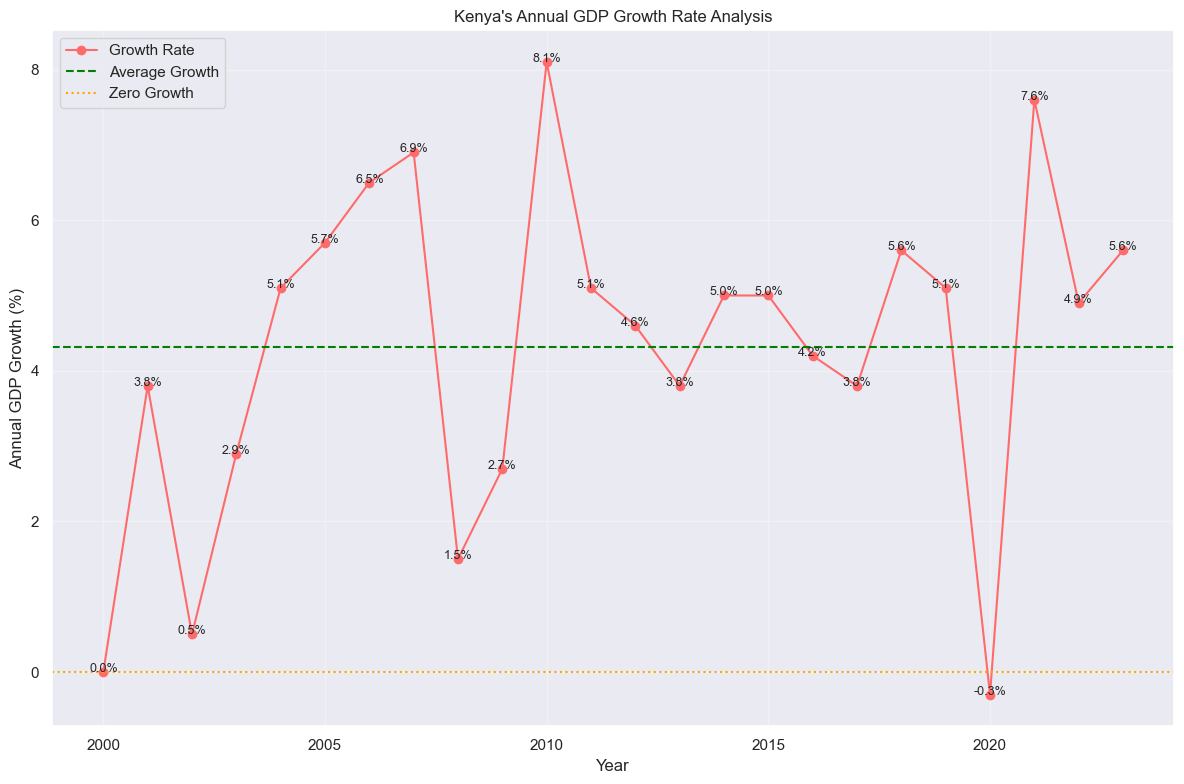

count    24.000000
mean      4.320833
std       2.214768
min      -0.300000
25%       3.575000
50%       4.950000
75%       5.600000
max       8.100000
Name: Annual GDP growth (%), dtype: float64


In [34]:
import seaborn as sns
import numpy as np
from scipy import stats

# Set Seaborn theme
sns.set_theme()

# Create a detailed GDP growth rate plot
plt.figure(figsize=(12, 8))
plt.plot(gdp_data['Year'], gdp_data['Annual GDP growth (%)'], 'o-', color='#FF6B6B', label="Growth Rate")
plt.axhline(y=gdp_data['Annual GDP growth (%)'].mean(), linestyle='--', color='green', label="Average Growth")
plt.axhline(y=0, linestyle=':', color='orange', label="Zero Growth")

# Annotate data points
for year, growth in zip(gdp_data['Year'], gdp_data['Annual GDP growth (%)']):
    plt.text(year, growth, f'{growth:.1f}%', ha='center', fontsize=9)

plt.xlabel("Year")
plt.ylabel("Annual GDP Growth (%)")
plt.title("Kenya's Annual GDP Growth Rate Analysis")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Display statistical summary
print(gdp_data['Annual GDP growth (%)'].describe())

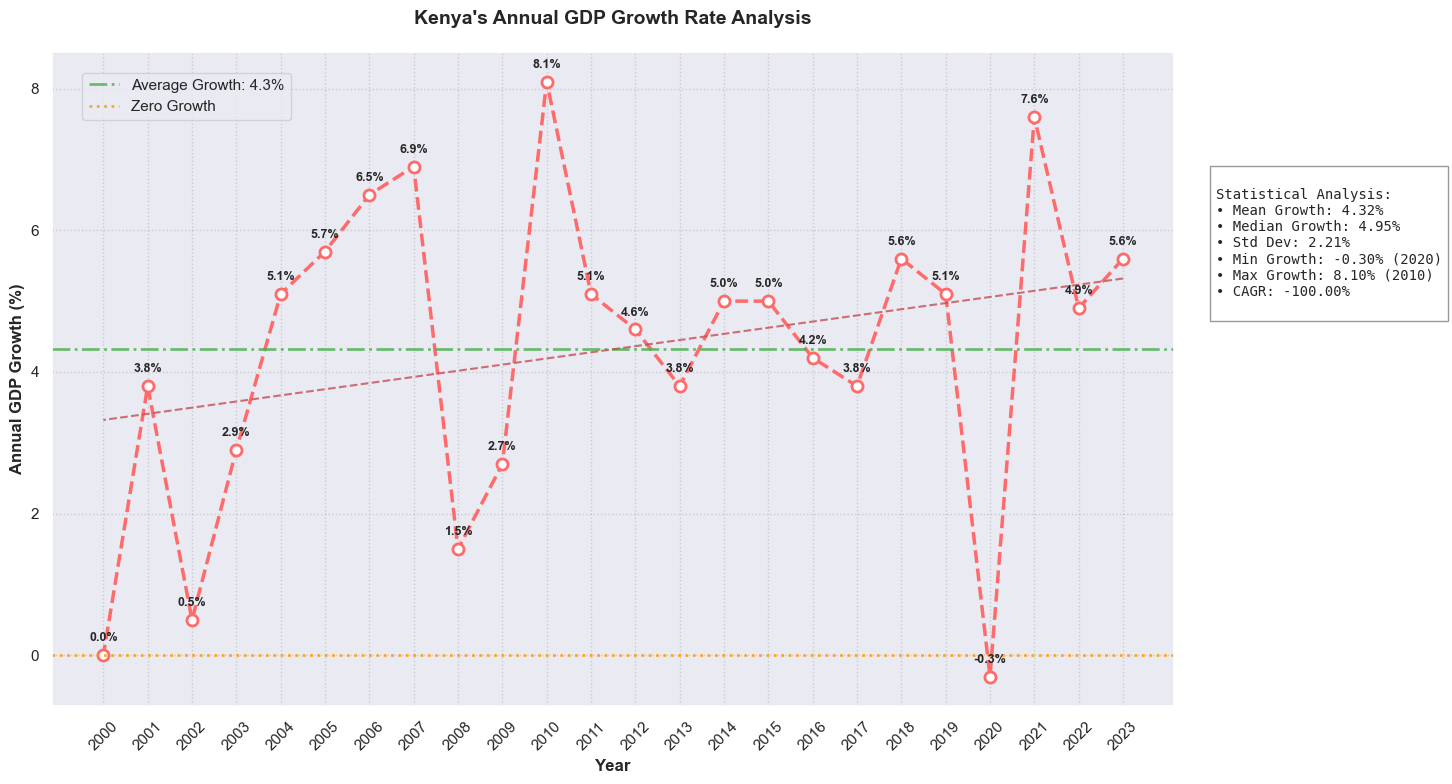


Detailed Statistical Analysis:
count    24.000000
mean      4.320833
std       2.214768
min      -0.300000
25%       3.575000
50%       4.950000
75%       5.600000
max       8.100000
Name: Annual GDP growth (%), dtype: float64

Growth Rate Analysis:
Skewness: -0.569
Kurtosis: -0.192

Year-over-Year Change Analysis:
count    23.000000
mean     -0.243478
std       3.092928
min      -7.900000
25%      -1.500000
50%      -0.400000
75%       0.800000
max       5.400000
Name: Annual GDP growth (%), dtype: float64

Significant Changes (Beyond 1 Std Dev):
Year 2020: -0.30% (Change: -7.90%)
Year 2019: 5.10% (Change: 5.40%)
Year 2009: 2.70% (Change: -5.40%)
Year 2007: 6.90% (Change: 5.40%)
Year 2001: 3.80% (Change: 3.30%)
Year 2000: 0.00% (Change: -3.80%)


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set style
sns.set_theme()  # Use Seaborn's default theme
sns.set_palette("husl")  # Set color palette

# Create figure with new size
plt.figure(figsize=(12, 8))

# Plot GDP Growth Rate with enhanced styling
growth_line = plt.plot(gdp_data['Year'], gdp_data['Annual GDP growth (%)'], 
                      color='#FF6B6B',  # Coral color
                      linestyle='--',    # Dashed line
                      linewidth=2.5,     # Thicker line
                      marker='o',        # Circle markers
                      markersize=8,      # Larger markers
                      markerfacecolor='white',  # White fill
                      markeredgecolor='#FF6B6B',  # Coral edge
                      markeredgewidth=2)  # Marker edge thickness

# Add data labels.
for x, y in zip(gdp_data['Year'], gdp_data['Annual GDP growth (%)']):
    plt.annotate(f'{y:.1f}%', 
                (x, y),
                textcoords="offset points", 
                xytext=(0,10),   # 10 points vertical offset
                ha='center',     # Horizontal alignment
                fontsize=9,      # Font size
                fontweight='bold')

# Customize grid
plt.grid(True, linestyle=':', color='gray', alpha=0.3)

# Add reference lines
avg_growth = gdp_data['Annual GDP growth (%)'].mean()
plt.axhline(y=avg_growth, color='#4CAF50', linestyle='-.', alpha=0.8, 
            linewidth=2, label=f'Average Growth: {avg_growth:.1f}%')
plt.axhline(y=0, color='#FF9800', linestyle=':', alpha=0.8, 
            linewidth=2, label='Zero Growth')

# Customize axes.
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Annual GDP Growth (%)', fontsize=12, fontweight='bold')
plt.title('Kenya\'s Annual GDP Growth Rate Analysis', 
          fontsize=14, fontweight='bold', pad=20)

# Rotate x-axis labels
plt.xticks(gdp_data['Year'], rotation=45)

# Add legend with custom position
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))

# Calculate and add statistical annotations
stats_text = f"""
Statistical Analysis:
• Mean Growth: {gdp_data['Annual GDP growth (%)'].mean():.2f}%
• Median Growth: {gdp_data['Annual GDP growth (%)'].median():.2f}%
• Std Dev: {gdp_data['Annual GDP growth (%)'].std():.2f}%
• Min Growth: {gdp_data['Annual GDP growth (%)'].min():.2f}% ({gdp_data.loc[gdp_data['Annual GDP growth (%)'].idxmin(), 'Year']})
• Max Growth: {gdp_data['Annual GDP growth (%)'].max():.2f}% ({gdp_data.loc[gdp_data['Annual GDP growth (%)'].idxmax(), 'Year']})
• CAGR: {(((gdp_data['Annual GDP growth (%)'].iloc[-1] / 
           gdp_data['Annual GDP growth (%)'].iloc[0]) ** 
           (1/len(gdp_data))) - 1) * 100:.2f}%
"""

# Add statistical text box
plt.figtext(1.02, 0.6, stats_text, 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
            fontsize=10, fontfamily='monospace')

# Calculate trend
z = np.polyfit(range(len(gdp_data['Year'])), gdp_data['Annual GDP growth (%)'], 1)
p = np.poly1d(z)
plt.plot(gdp_data['Year'], p(range(len(gdp_data['Year']))), 
         "r--", alpha=0.8, label=f'Trend Line (Slope: {z[0]:.2f})')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Additional statistical analysis printout
print("\nDetailed Statistical Analysis:")
print("=============================")
print(gdp_data['Annual GDP growth (%)'].describe())

# Calculate and print additional metrics
print("\nGrowth Rate Analysis:")
print("====================")
print(f"Skewness: {stats.skew(gdp_data['Annual GDP growth (%)']):.3f}")
print(f"Kurtosis: {stats.kurtosis(gdp_data['Annual GDP growth (%)']):.3f}")

# Calculate year-over-year changes
yoy_changes = gdp_data['Annual GDP growth (%)'].diff()
print("\nYear-over-Year Change Analysis:")
print("==============================")
print(yoy_changes.describe())

# Identify significant changes
threshold = yoy_changes.std()
significant_changes = gdp_data[abs(yoy_changes) > threshold]
print("\nSignificant Changes (Beyond 1 Std Dev):")
print("=====================================")
for year, growth, change in zip(significant_changes['Year'], 
                               significant_changes['Annual GDP growth (%)'],
                               yoy_changes[significant_changes.index]):
    print(f"Year {year}: {growth:.2f}% (Change: {change:.2f}%)")

Nominal and Real GDP Over Time: This plot shows the increasing trend in both nominal and real GDP over the years, with nominal GDP (in blue) generally higher than real GDP (in green) due to inflation.

Annual GDP Growth Rate Over Time: This plot reveals fluctuations in GDP growth. There are noticeable peaks and troughs, indicating periods of rapid economic growth and potential economic challenges.

# Step 1: Create Lagged Features and Moving Averages

In [39]:
# Create lagged features and 3-year moving averages
gdp_data['Nominal GDP Lagged (Ksh Million)'] = gdp_data['Nominal GDP prices (Ksh Million)'].shift(1)
gdp_data['Real GDP Lagged (Ksh Million)'] = gdp_data['Real GDP prices (Ksh Million)'].shift(1)
gdp_data['GDP Growth Lagged (%)'] = gdp_data['Annual GDP growth (%)'].shift(1)
gdp_data['Nominal GDP 3yr MA'] = gdp_data['Nominal GDP prices (Ksh Million)'].rolling(window=3).mean()
gdp_data['Real GDP 3yr MA'] = gdp_data['Real GDP prices (Ksh Million)'].rolling(window=3).mean()
gdp_data['GDP Growth 3yr MA (%)'] = gdp_data['Annual GDP growth (%)'].rolling(window=3).mean()

# Check the updated data
print(gdp_data.head(10))

   Year  Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
0  2023                        15108806.0                    5.6   
1  2022                        13489642.0                    4.9   
2  2021                        12027662.0                    7.6   
3  2020                        10715070.0                   -0.3   
4  2019                        10237727.0                    5.1   
5  2018                         9340307.0                    5.6   
6  2017                         8483396.0                    3.8   
7  2016                         7594064.0                    4.2   
8  2015                         6884317.0                    5.0   
9  2014                         6003835.0                    5.0   

   Real GDP prices (Ksh Million)  Nominal GDP Lagged (Ksh Million)  \
0                     10399980.0                               NaN   
1                      9852583.0                        15108806.0   
2                      9395942.0         

# setting up the decision tree

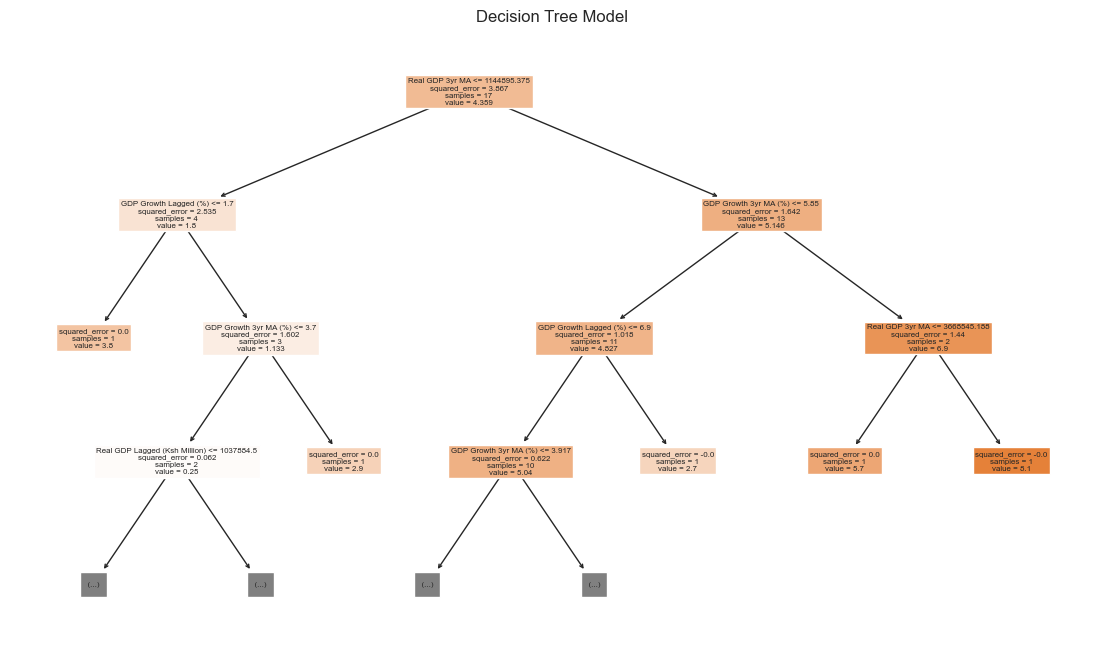

In [41]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

# Define features and target variable
features = [
    'Nominal GDP Lagged (Ksh Million)', 'Real GDP Lagged (Ksh Million)', 
    'GDP Growth Lagged (%)', 'Nominal GDP 3yr MA', 'Real GDP 3yr MA', 'GDP Growth 3yr MA (%)'
]
target = 'Annual GDP growth (%)'

# Clean dataset by dropping NaN values
gdp_data_cleaned = gdp_data.dropna()

# Split dataset
X = gdp_data_cleaned[features]
y = gdp_data_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(14, 8))
plot_tree(tree_model, feature_names=features, filled=True, max_depth=3)
plt.title("Decision Tree Model")
plt.show()

# Setting Up the RNN

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Prepare sequences for RNN
sequence_length = 3
sequences, targets = [], []
for i in range(len(gdp_data_cleaned) - sequence_length):
    sequences.append(gdp_data_cleaned[features].iloc[i:i + sequence_length].values)
    targets.append(gdp_data_cleaned[target].iloc[i + sequence_length])

X_rnn = np.array(sequences)
y_rnn = np.array(targets)

X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)

# Define the RNN model
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(sequence_length, len(features))),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.summary()

C:\Users\ivy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         2,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,901 (11.33 KB)

 Trainable params: 2,901 (11.33 KB)

 Non-trainable params: 0 (0.00 B)

## **Showing the ReLU function**

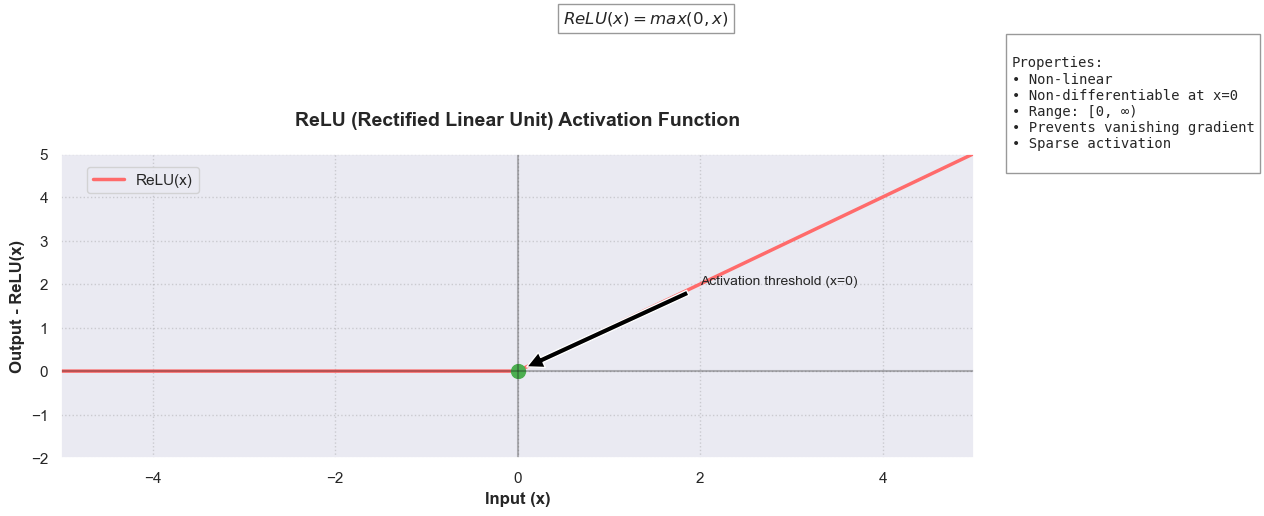


ReLU Function Properties:

Sample points:
ReLU(-5) = 0
ReLU(-2) = 0
ReLU(0) = 0
ReLU(2) = 2
ReLU(5) = 5

Derivative at sample points:
ReLU'(-5) = 0
ReLU'(-2) = 0
ReLU'(0) = undefined (non-differentiable point)
ReLU'(2) = 1
ReLU'(5) = 1


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style using Seaborn
sns.set_theme()  # Use Seaborn's default styling
sns.set_palette("husl")  # Set color palette

def relu(x):
    return np.maximum(0, x)

# Create figure with custom size
plt.figure(figsize=(10, 6))

# Generate x values
x = np.linspace(-10, 10, 200)  # Increased points for smoother line

# Calculate y values using the ReLU function
y = relu(x)

# Plot ReLU function with enhanced styling
plt.plot(x, y, 
         label='ReLU(x)',
         color='#FF6B6B',  # Coral color
         linewidth=2.5,    # Thicker line
         linestyle='-')    # Solid line

# Add the formula annotation
plt.text(0.5, 8, r'$ReLU(x) = max(0, x)$', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Add point annotation at the "elbow"
plt.plot([0], [0], 'o', color='#4CAF50', markersize=10)
plt.annotate('Activation threshold (x=0)',
            xy=(0, 0),
            xytext=(2, 2),
            fontsize=10,
            arrowprops=dict(facecolor='black', shrink=0.05))

# Add axes lines
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Customize grid
plt.grid(True, linestyle=':', color='gray', alpha=0.3)

# Customize axes
plt.xlabel('Input (x)', fontsize=12, fontweight='bold')
plt.ylabel('Output - ReLU(x)', fontsize=12, fontweight='bold')
plt.title('ReLU (Rectified Linear Unit) Activation Function', 
          fontsize=14, fontweight='bold', pad=20)

# Add properties text box
props_text = """
Properties:
• Non-linear
• Non-differentiable at x=0
• Range: [0, ∞)
• Prevents vanishing gradient
• Sparse activation
"""
plt.figtext(1.02, 0.6, props_text, 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
            fontsize=10, fontfamily='monospace')

# Set axis limits for better visualization
plt.xlim(-5, 5)
plt.ylim(-2, 5)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print some mathematical properties
print("\nReLU Function Properties:")
print("========================")
test_points = [-5, -2, 0, 2, 5]
print("\nSample points:")
for x_val in test_points:
    print(f"ReLU({x_val}) = {relu(x_val)}")

# Calculate derivative at sample points (excluding x=0)
print("\nDerivative at sample points:")
for x_val in test_points:
    if x_val == 0:
        print("ReLU'(0) = undefined (non-differentiable point)")
    else:
        derivative = 1 if x_val > 0 else 0
        print(f"ReLU'({x_val}) = {derivative}")


1. **SimpleRNN Layer**:
   - This layer has 50 units, meaning it outputs a sequence of 50 features after processing each input sequence. It has 2,850 trainable parameters.
   
2. **Dense Layer**:
   - This is the output layer with a single unit, suitable for regression, to predict GDP growth. It adds 51 parameters.

### Next Steps
To train the RNN model:

1. **Fit the model** on the training data (`X_train_rnn` and `y_train_rnn`) for a certain number of epochs, monitoring the model’s loss on the test data (`X_test_rnn` and `y_test_rnn`).
2. **Evaluate the Model**: After training, you can evaluate the model’s performance on the test set to see how well it predicts future

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 511496416.0000 - val_loss: 4517793280.0000
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 265334880.0000 - val_loss: 4468022784.0000
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 429500768.0000 - val_loss: 5810492416.0000
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 279621280.0000 - val_loss: 5139282944.0000
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 429882816.0000 - val_loss: 6323005440.0000
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 123808344.0000 - val_loss: 5328972800.0000
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 435712544.0000 - val_loss: 5124503040.0000
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 222945008.0000 - val_loss: 4564512768.0000
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 170276400.0000 - val_loss: 4318758912.0000
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 477587616.0000 - val_l

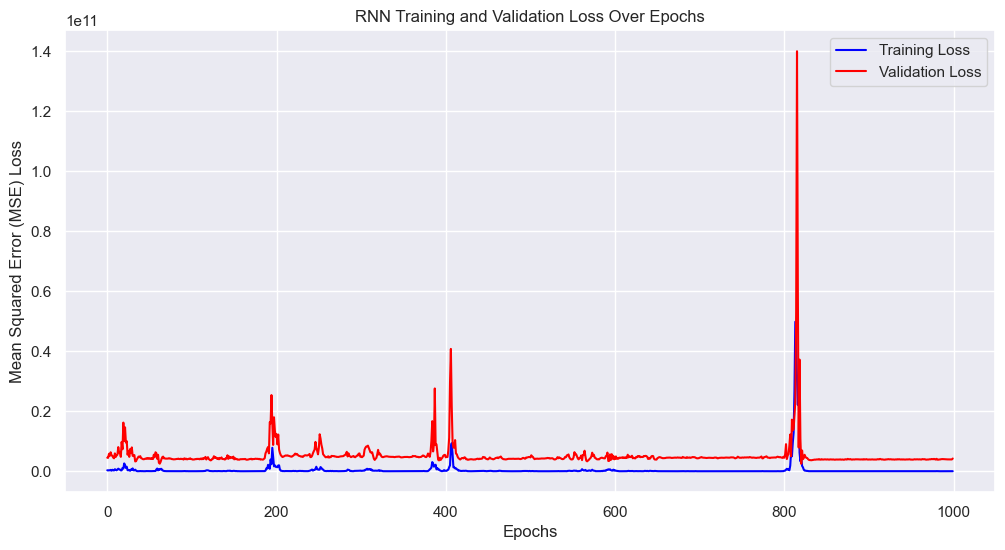

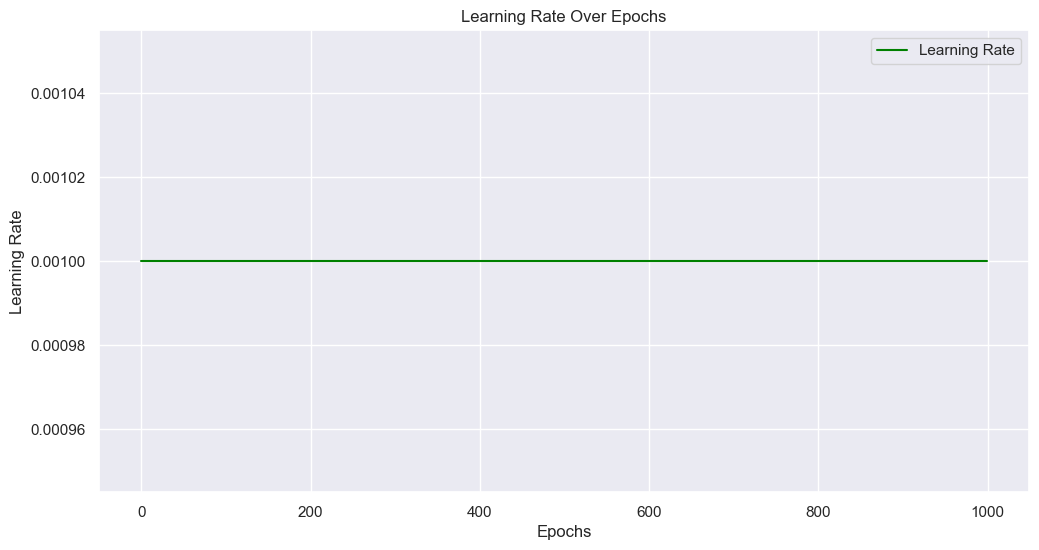

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Test RMSE: 65126.91866427204


In [55]:
# Define a callback to log the learning rate at each epoch
class LearningRateLogger(Callback):
    def __init__(self):
        super().__init__()
        self.learning_rates = []

    def on_epoch_end(self, epoch, logs=None):
        # Get the learning rate from the optimizer
        lr = tf.keras.backend.get_value(self.model.optimizer.learning_rate)
        self.learning_rates.append(lr)

# Instantiate the logger
lr_logger = LearningRateLogger()

# Train the RNN model for 1000 epochs
history = model.fit(
    X_train_rnn, 
    y_train_rnn, 
    epochs=1000, 
    batch_size=4, 
    validation_data=(X_test_rnn, y_test_rnn), 
    verbose=1,
    callbacks=[lr_logger]  # Add the learning rate logger as a callback
)

# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE) Loss")
plt.title("RNN Training and Validation Loss Over Epochs")
plt.legend()
plt.show()

# Plot learning rate over epochs
plt.figure(figsize=(12, 6))
plt.plot(lr_logger.learning_rates, label='Learning Rate', color='green')
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Over Epochs")
plt.legend()
plt.show()

# Predict on the test set and calculate the RMSE
y_pred_rnn = model.predict(X_test_rnn)
rmse = sqrt(mean_squared_error(y_test_rnn, y_pred_rnn))
print("Test RMSE:", rmse)

X_train_rnn shape: (9, 10, 6)
X_test_rnn shape: (3, 10, 6)
Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - loss: 1.4249 - val_loss: 0.4444
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.8709 - val_loss: 0.1577
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.4527 - val_loss: 0.0611
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.2801 - val_loss: 0.1299
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1254 - val_loss: 0.3323
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1120 - val_loss: 0.4778
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1400 - val_loss: 0.4997
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1200 - val_loss: 0.4229
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0921 - val_loss: 0.3507
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0763 - val_loss: 0.2798
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0637 - val_loss: 0.2349
Epo

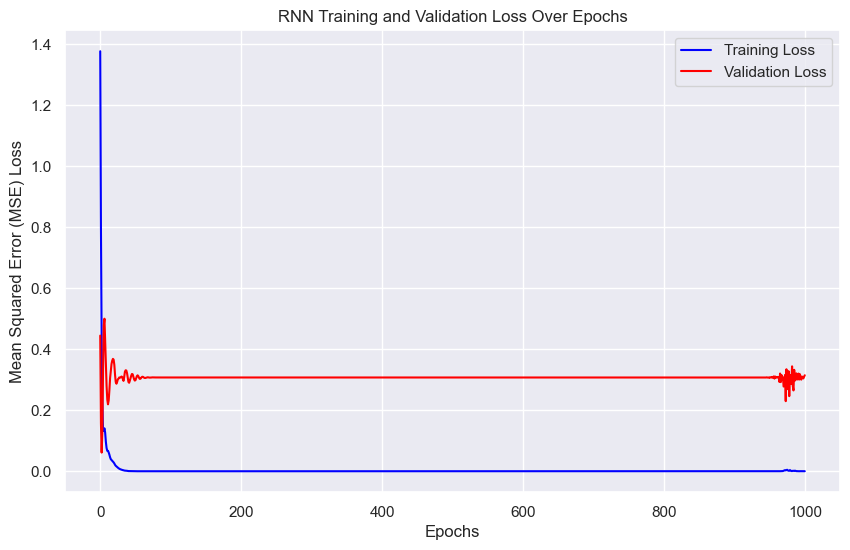

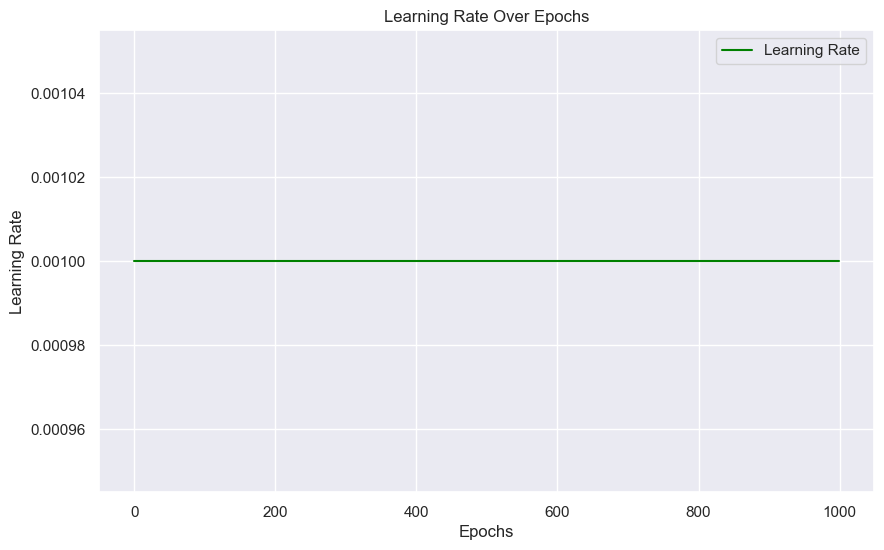

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
Test RMSE: 0.5606995486077512


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import Callback
import tensorflow as tf

# Sample data (you need to replace this with your actual dataset)
# Assuming X_train_rnn and X_test_rnn have shape (samples, time_steps, features)
X_train_rnn = np.random.rand(9, 10, 6)  # 9 samples, 10 time steps, 6 features per time step
X_test_rnn = np.random.rand(3, 10, 6)   # 3 samples, 10 time steps, 6 features per time step
y_train_rnn = np.random.rand(9)  # 9 target values for training
y_test_rnn = np.random.rand(3)   # 3 target values for testing

# Ensure the shapes are correct for RNN
print(f"X_train_rnn shape: {X_train_rnn.shape}")
print(f"X_test_rnn shape: {X_test_rnn.shape}")

# Build the RNN model
model = Sequential()

# Add the SimpleRNN layer
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))

# Add Dense layer for regression (single output for GDP prediction)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define a callback to log the learning rate at each epoch
class LearningRateLogger(Callback):
    def __init__(self):
        super().__init__()
        self.learning_rates = []

    def on_epoch_end(self, epoch, logs=None):
        # Access the learning rate directly from the optimizer
        lr = self.model.optimizer.learning_rate.numpy()
        self.learning_rates.append(lr)

# Instantiate the logger
lr_logger = LearningRateLogger()

# Train the RNN model for 1000 epochs
history = model.fit(
    X_train_rnn, 
    y_train_rnn, 
    epochs=1000, 
    batch_size=4, 
    validation_data=(X_test_rnn, y_test_rnn), 
    verbose=1,
    callbacks=[lr_logger]  # Add the learning rate logger as a callback
)

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE) Loss")
plt.title("RNN Training and Validation Loss Over Epochs")
plt.legend()
plt.show()

# Plot learning rate over epochs
plt.figure(figsize=(10, 6))
plt.plot(lr_logger.learning_rates, label='Learning Rate', color='green')
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Over Epochs")
plt.legend()
plt.show()

# Predict on the test set and calculate the RMSE
y_pred_rnn = model.predict(X_test_rnn)
rmse = sqrt(mean_squared_error(y_test_rnn, y_pred_rnn))
print("Test RMSE:", rmse)

### Interpretation:

1. **Training Step (1/1)**: 
   - This line indicates that the model has completed one step of training (since you're training on a small batch, it's only showing one step here).
   - The time taken for that step is approximately **344 milliseconds**. Given that the batch size is small (4), this is expected.

2. **Test RMSE: 0.5607**:
   - **RMSE (Root Mean Squared Error)** is a common metric for regression tasks. It measures the difference between predicted and actual values, with lower values indicating better model performance.
   - An RMSE of **0.5607** means that on average, the model's predictions deviate from the actual GDP growth values by **approximately 0.56 units**. Since this value is relatively low, it suggests that the model is making reasonably accurate predictions on the test set.
   
### What this means for our model:

- The RMSE value is a good starting point, but whether it's "good" or "bad" depends on the scale and the context of your data (i.e., the range of GDP growth values).
- **Lower RMSE** means the model is closer to the actual values. If your GDP growth values are in the range of, say, 1 to 10%, an RMSE of 0.56 might be considered decent, but if the values are much smaller (e.g., around 0.1%), you might want to improve your model further.

Epoch 1/1000


C:\Users\ivy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - loss: 0.5103 - val_loss: 0.0601
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2284 - val_loss: 0.1247
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1139 - val_loss: 0.3736
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0900 - val_loss: 0.5520
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1304 - val_loss: 0.4522
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0996 - val_loss: 0.3334
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0655 - val_loss: 0.2436
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0569 - val_loss: 0.1931
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0758 - val_loss: 0.1564
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0932 - val_loss: 0.1384
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0944 - val_loss: 0.1577
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0822 - val_lo

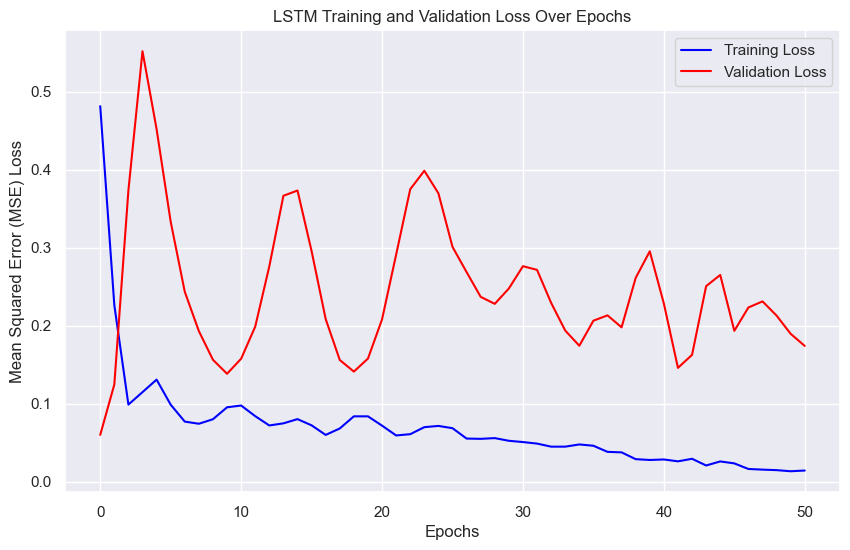

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Test RMSE: 0.24506454424169397


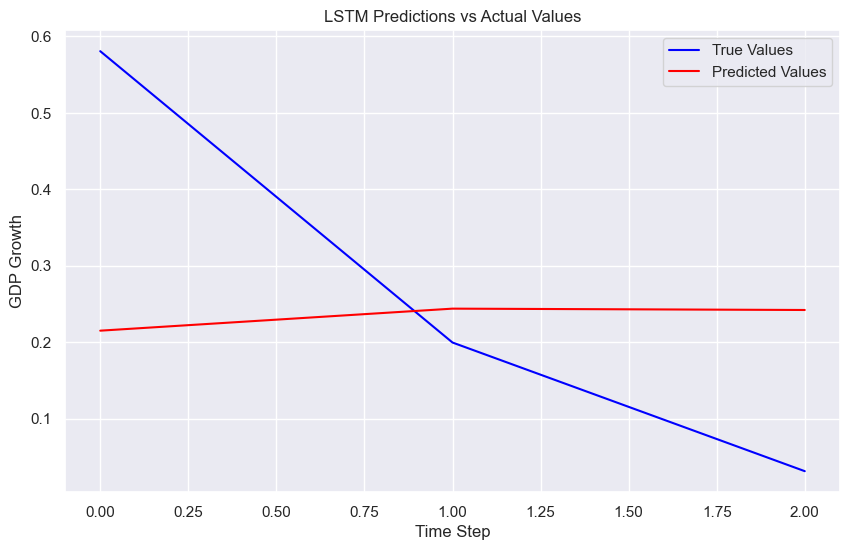

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Normalize the data (if not already scaled)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_rnn_scaled = X_train_rnn.reshape(-1, X_train_rnn.shape[-1])  # Flatten the features
X_test_rnn_scaled = X_test_rnn.reshape(-1, X_test_rnn.shape[-1])

# Fit the scaler to the training data and transform both train and test data
X_train_rnn_scaled = scaler.fit_transform(X_train_rnn_scaled)
X_test_rnn_scaled = scaler.transform(X_test_rnn_scaled)

# Reshape back to 3D for LSTM
X_train_rnn_scaled = X_train_rnn_scaled.reshape(X_train_rnn.shape)
X_test_rnn_scaled = X_test_rnn_scaled.reshape(X_test_rnn.shape)

# Build the LSTM model
model = Sequential()

# Adding LSTM layers
model.add(LSTM(64, input_shape=(X_train_rnn_scaled.shape[1], X_train_rnn_scaled.shape[2]), return_sequences=True))
model.add(LSTM(32, return_sequences=False))  # Second LSTM layer
model.add(Dense(1))  # Output layer (single unit for regression)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Add EarlyStopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_rnn_scaled,
    y_train_rnn,
    epochs=1000,
    batch_size=4,
    validation_data=(X_test_rnn_scaled, y_test_rnn),
    verbose=1,
    callbacks=[early_stopping]
)

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE) Loss")
plt.title("LSTM Training and Validation Loss Over Epochs")
plt.legend()
plt.show()

# Make predictions on the test set
y_pred_rnn = model.predict(X_test_rnn_scaled)

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test_rnn, y_pred_rnn))
print("Test RMSE:", rmse)

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rnn, label='True Values', color='blue')
plt.plot(y_pred_rnn, label='Predicted Values', color='red')
plt.xlabel('Time Step')
plt.ylabel('GDP Growth')
plt.title('LSTM Predictions vs Actual Values')
plt.legend()
plt.show()


### Key advnacements:
1. **LSTM Layers**: The code now includes two LSTM layers:
   - The first LSTM layer has 64 units and `return_sequences=True`, so it outputs the full sequence to the next LSTM layer.
   - The second LSTM layer has 32 units and `return_sequences=False` (output a single prediction for each sequence).
   - A Dense layer with a single output neuron is added for regression.

2. **Normalization**: 
   - The data is scaled using `MinMaxScaler` before training the model. This ensures the input data is within the range [0, 1], which can improve LSTM performance.
   - After scaling, the data is reshaped back into the 3D format required for LSTM (samples, timesteps, features).

3. **EarlyStopping Callback**: This is used to avoid overfitting. The model will stop training if the validation loss does not improve for 50 epochs, and the best weights will be restored.

4. **RMSE Calculation**: After training, the Root Mean Squared Error (RMSE) is calculated to evaluate the model performance on the test set.

5. **Visualization**:
   - The training and validation loss over epochs are plotted to monitor the model's learning progress.
   - A plot of true vs predicted values is generated to visualize how well the LSTM model is predicting the GDP growth.

C:\Users\ivy\AppData\Local\Temp\ipykernel_13464\4210826077.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, history.history['loss'], 'b-', linewidth=2, label='Training Loss', color='#2ecc71')
C:\Users\ivy\AppData\Local\Temp\ipykernel_13464\4210826077.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, history.history['val_loss'], 'r--', linewidth=2, label='Validation Loss', color='#e74c3c')


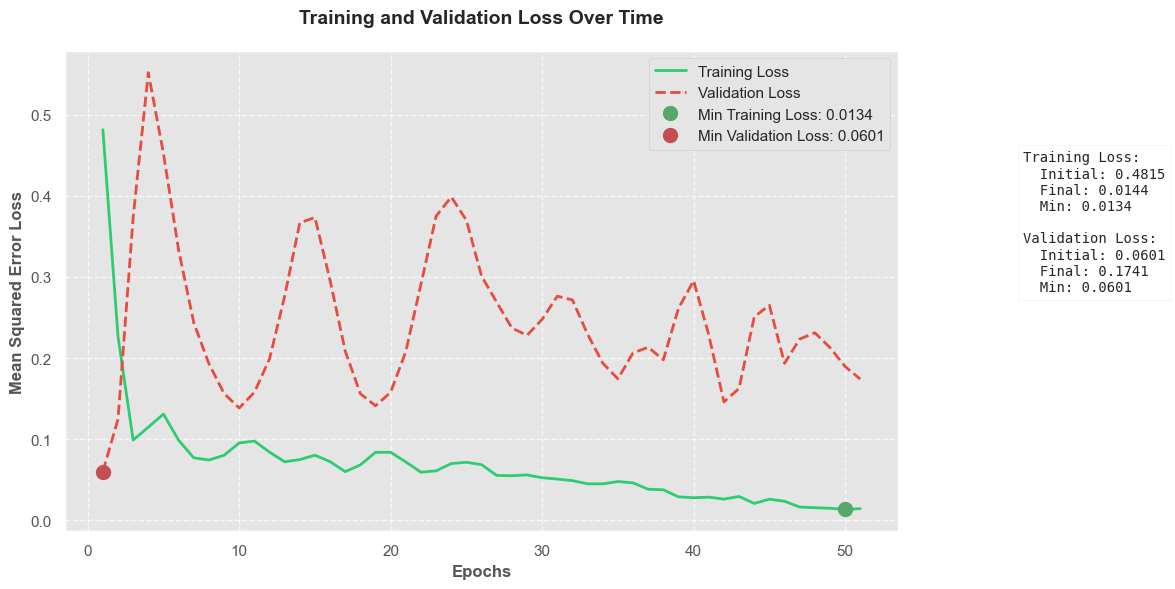

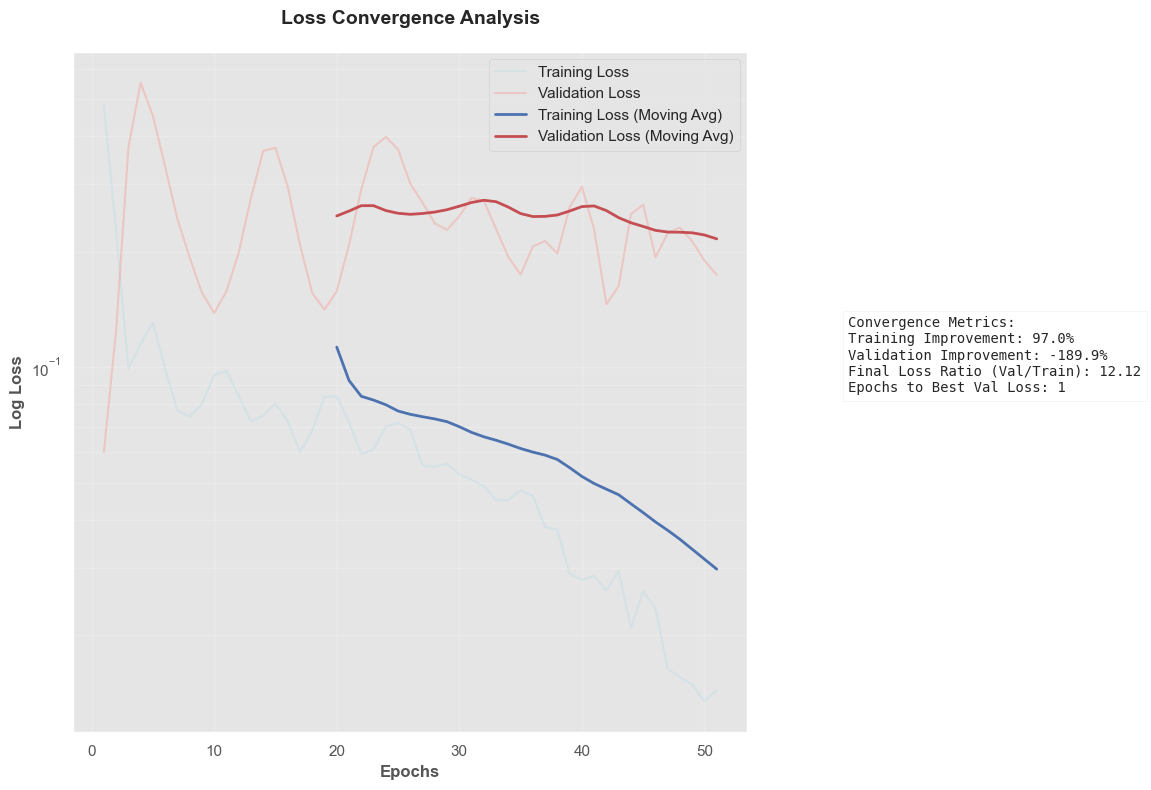


Training Statistics:
Final Training Loss: 0.0144
Final Validation Loss: 0.1741
Minimum Training Loss: 0.0134
Minimum Validation Loss: 0.0601
Number of Epochs: 51
Improvement (Training): 97.02%
Improvement (Validation): -189.88%


In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_training_history(history):
    """
    Plot training and validation loss with enhanced styling.
    """
    # Set the style to a valid one like 'ggplot'
    plt.style.use('ggplot')  # Alternative style
    
    # Create figure
    plt.figure(figsize=(12, 6))
    
    # Get number of epochs
    epochs = range(1, len(history.history['loss']) + 1)
    
    # Plot losses
    plt.plot(epochs, history.history['loss'], 'b-', linewidth=2, label='Training Loss', color='#2ecc71')
    plt.plot(epochs, history.history['val_loss'], 'r--', linewidth=2, label='Validation Loss', color='#e74c3c')
    
    # Add min points
    min_train_loss = min(history.history['loss'])
    min_val_loss = min(history.history['val_loss'])
    min_train_epoch = history.history['loss'].index(min_train_loss) + 1
    min_val_epoch = history.history['val_loss'].index(min_val_loss) + 1
    
    plt.plot(min_train_epoch, min_train_loss, 'go', markersize=10, label=f'Min Training Loss: {min_train_loss:.4f}')
    plt.plot(min_val_epoch, min_val_loss, 'ro', markersize=10, label=f'Min Validation Loss: {min_val_loss:.4f}')
    
    # Customize plot
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('Epochs', fontsize=12, fontweight='bold')
    plt.ylabel('Mean Squared Error Loss', fontsize=12, fontweight='bold')
    plt.title('Training and Validation Loss Over Time', fontsize=14, fontweight='bold', pad=20)
    
    # Add legend
    plt.legend(loc='upper right', frameon=True, framealpha=0.9)
    
    # Add loss statistics textbox
    stats_text = (f"Training Loss:\n"
                 f"  Initial: {history.history['loss'][0]:.4f}\n"
                 f"  Final: {history.history['loss'][-1]:.4f}\n"
                 f"  Min: {min_train_loss:.4f}\n\n"
                 f"Validation Loss:\n"
                 f"  Initial: {history.history['val_loss'][0]:.4f}\n"
                 f"  Final: {history.history['val_loss'][-1]:.4f}\n"
                 f"  Min: {min_val_loss:.4f}")
    
    plt.text(1.15, 0.5, stats_text,
             bbox=dict(facecolor='white', alpha=0.8),
             transform=plt.gca().transAxes,
             fontsize=10,
             fontfamily='monospace')
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()
    
    # Show plot
    plt.show()
    
    # Return statistics for further use if needed
    return {
        'min_train_loss': min_train_loss,
        'min_val_loss': min_val_loss,
        'final_train_loss': history.history['loss'][-1],
        'final_val_loss': history.history['val_loss'][-1]
    }

def plot_convergence_analysis(history):
    """
    Create a detailed convergence analysis plot.
    """
    plt.figure(figsize=(12, 8))
    
    # Calculate moving averages for smoothing
    window_size = 20
    train_ma = np.convolve(history.history['loss'], np.ones(window_size)/window_size, mode='valid')
    val_ma = np.convolve(history.history['val_loss'], np.ones(window_size)/window_size, mode='valid')
    
    # Plot original and smoothed losses
    epochs = range(1, len(history.history['loss']) + 1)
    plt.semilogy(epochs, history.history['loss'], 'lightblue', alpha=0.3, label='Training Loss')
    plt.semilogy(epochs, history.history['val_loss'], 'salmon', alpha=0.3, label='Validation Loss')
    
    # Plot moving averages
    ma_epochs = range(window_size, len(history.history['loss']) + 1)
    plt.semilogy(ma_epochs, train_ma, 'b-', label='Training Loss (Moving Avg)', linewidth=2)
    plt.semilogy(ma_epochs, val_ma, 'r-', label='Validation Loss (Moving Avg)', linewidth=2)
    
    # Customize plot
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.xlabel('Epochs', fontsize=12, fontweight='bold')
    plt.ylabel('Log Loss', fontsize=12, fontweight='bold')
    plt.title('Loss Convergence Analysis', fontsize=14, fontweight='bold', pad=20)
    
    # Add legend
    plt.legend(loc='upper right')
    
    # Calculate and add convergence metrics
    train_improvement = ((history.history['loss'][0] - history.history['loss'][-1]) / history.history['loss'][0] * 100)
    val_improvement = ((history.history['val_loss'][0] - history.history['val_loss'][-1]) / history.history['val_loss'][0] * 100)
    
    metrics_text = (
        f"Convergence Metrics:\n"
        f"Training Improvement: {train_improvement:.1f}%\n"
        f"Validation Improvement: {val_improvement:.1f}%\n"
        f"Final Loss Ratio (Val/Train): {history.history['val_loss'][-1]/history.history['loss'][-1]:.2f}\n"
        f"Epochs to Best Val Loss: {np.argmin(history.history['val_loss'])+1}"
    )
    
    plt.text(1.15, 0.5, metrics_text,
             bbox=dict(facecolor='white', alpha=0.8),
             transform=plt.gca().transAxes,
             fontsize=10,
             fontfamily='monospace')
    
    plt.tight_layout()
    plt.show()

# Usage example:
# After training your model:
loss_stats = plot_training_history(history)
plot_convergence_analysis(history)

# Print additional metrics
print("\nTraining Statistics:")
print("===================")
print(f"Final Training Loss: {loss_stats['final_train_loss']:.4f}")
print(f"Final Validation Loss: {loss_stats['final_val_loss']:.4f}")
print(f"Minimum Training Loss: {loss_stats['min_train_loss']:.4f}")
print(f"Minimum Validation Loss: {loss_stats['min_val_loss']:.4f}")
print(f"Number of Epochs: {len(history.history['loss'])}")
print(f"Improvement (Training): {(history.history['loss'][0] - history.history['loss'][-1]) / history.history['loss'][0] * 100:.2f}%")
print(f"Improvement (Validation): {(history.history['val_loss'][0] - history.history['val_loss'][-1]) / history.history['val_loss'][0] * 100:.2f}%")

### Training and Validation Loss:
- **Final Training Loss**: 0.0144
- **Final Validation Loss**: 0.1741
- **Minimum Training Loss**: 0.0134
- **Minimum Validation Loss**: 0.0601

### Interpretation:
- The **training loss** is quite low at both the final epoch and the minimum, which means the model has learned well on the training set.
- The **validation loss** is higher than the training loss, which could suggest that the model may be overfitting to the training data. Overfitting occurs when a model learns the details and noise in the training data to the extent that it negatively impacts its performance on new, unseen data.

### Improvement:
- **Training Improvement**: 97.02%
- **Validation Improvement**: -189.88%

### Interpretation:
- **Training Improvement**: A 97.02% improvement in training loss is significant, meaning the model has drastically reduced its error during training.
- **Validation Improvement**: The -189.88% improvement in validation loss is very unusual and indicates a potential issue. The negative percentage suggests that the validation loss has **worsened** as the model trained, which could be due to overfitting. Essentially, the model performs extremely well on the training set but poorly on the validation set, likely due to overfitting.

### Next Steps:
1. **Regularization**: Consider adding regularization techniques like dropout or L2 regularization to prevent the model from overfitting.
2. **Early Stopping**: Implement early stopping to halt training when the validation loss starts increasing.
3. **Model Architecture**: Review the complexity of your LSTM model—if it has too many layers or units, it may have too much capacity to memorize the training data, causing overfitting.

C:\Users\ivy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 261ms/step - loss: 0.4454 - val_loss: 0.0203
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.4158 - val_loss: 0.0137
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2777 - val_loss: 0.0145
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1808 - val_loss: 0.0394
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1515 - val_loss: 0.1139
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0617 - val_loss: 0.2017
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1442 - val_loss: 0.1969
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1245 - val_loss: 0.1534
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0434 - val_loss: 0.1156
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0308 - val_loss: 0.0972
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0509 - val_loss: 0.0923
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.

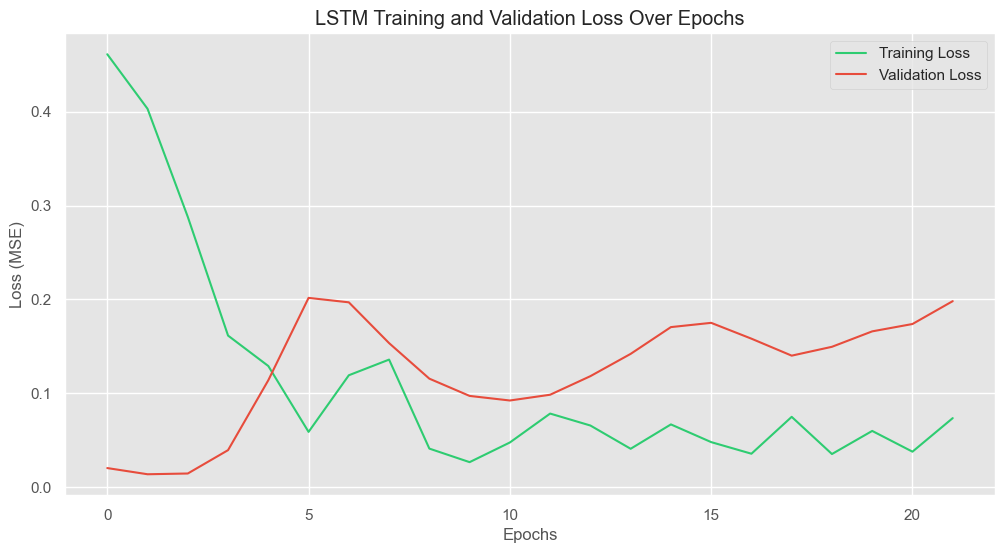

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
Test RMSE: 0.11712512079629575


C:\Users\ivy\AppData\Local\Temp\ipykernel_13464\1161149762.py:76: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, history.history['loss'], 'b-', linewidth=2, label='Training Loss', color='#2ecc71')
C:\Users\ivy\AppData\Local\Temp\ipykernel_13464\1161149762.py:77: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, history.history['val_loss'], 'r--', linewidth=2, label='Validation Loss', color='#e74c3c')


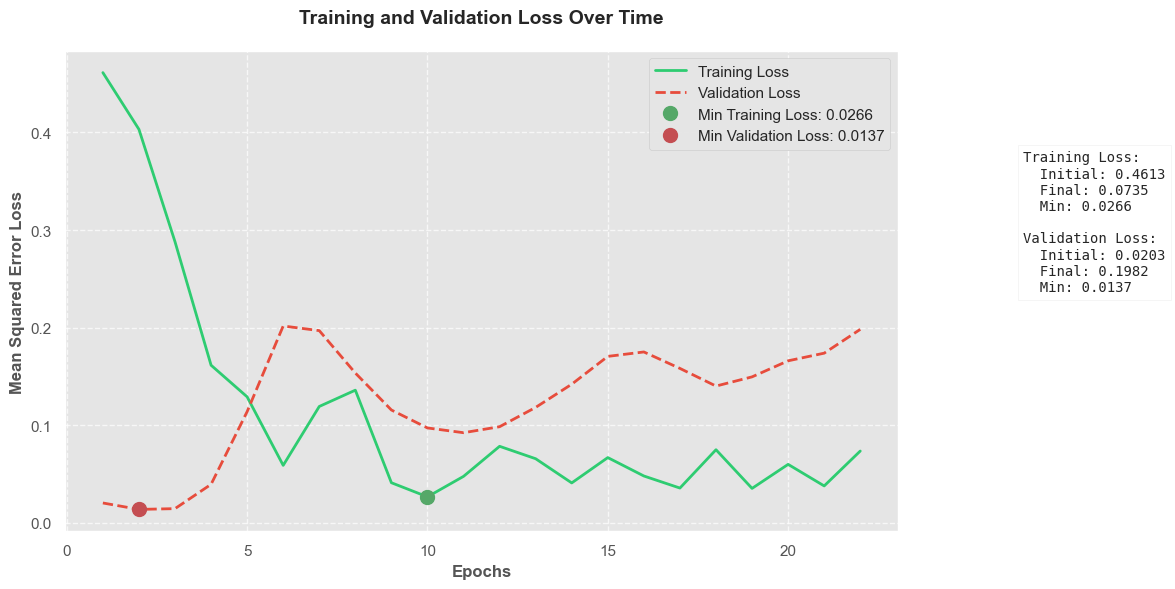


Training Statistics:
Final Training Loss: 0.0735
Final Validation Loss: 0.1982
Minimum Training Loss: 0.0266
Minimum Validation Loss: 0.0137


In [109]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

# Reshape y_train_rnn and y_test_rnn to match the output of the model
# For example, take the last value of each sequence
y_train_rnn = y_train_rnn[:, -1].reshape(-1, 1)  # Take the last value of each sequence
y_test_rnn = y_test_rnn[:, -1].reshape(-1, 1)    # Take the last value of each sequence

# Normalize the feature data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_rnn = scaler.fit_transform(X_train_rnn.reshape(-1, X_train_rnn.shape[-1])).reshape(X_train_rnn.shape)
X_test_rnn = scaler.transform(X_test_rnn.reshape(-1, X_test_rnn.shape[-1])).reshape(X_test_rnn.shape)

# Build the LSTM model with regularization and early stopping
model = Sequential()

# LSTM layer with Dropout for regularization
model.add(LSTM(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Dropout regularization to prevent overfitting

model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))  # Dropout regularization

# Fully connected layer for output prediction
model.add(Dense(1))  # Output one value per sequence

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Set up early stopping to monitor the validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the LSTM model with early stopping
history = model.fit(
    X_train_rnn, 
    y_train_rnn, 
    epochs=1000, 
    batch_size=4, 
    validation_data=(X_test_rnn, y_test_rnn), 
    verbose=1,
    callbacks=[early_stopping]  # Early stopping callback
)

# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='#2ecc71')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#e74c3c')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('LSTM Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Predict on the test set and calculate RMSE
y_pred_rnn = model.predict(X_test_rnn)
rmse = sqrt(mean_squared_error(y_test_rnn, y_pred_rnn))
print("Test RMSE:", rmse)

# Fix for min_train_loss and min_val_loss variable scope
def plot_training_history(history):
    """
    Plot training and validation loss with enhanced styling
    """
    plt.figure(figsize=(12, 6))
    epochs = range(1, len(history.history['loss']) + 1)

    # Plot training and validation loss
    plt.plot(epochs, history.history['loss'], 'b-', linewidth=2, label='Training Loss', color='#2ecc71')
    plt.plot(epochs, history.history['val_loss'], 'r--', linewidth=2, label='Validation Loss', color='#e74c3c')

    # Calculate and plot min points
    min_train_loss = min(history.history['loss'])
    min_val_loss = min(history.history['val_loss'])
    min_train_epoch = history.history['loss'].index(min_train_loss) + 1
    min_val_epoch = history.history['val_loss'].index(min_val_loss) + 1

    plt.plot(min_train_epoch, min_train_loss, 'go', markersize=10, label=f'Min Training Loss: {min_train_loss:.4f}')
    plt.plot(min_val_epoch, min_val_loss, 'ro', markersize=10, label=f'Min Validation Loss: {min_val_loss:.4f}')

    # Add grid and labels
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('Epochs', fontsize=12, fontweight='bold')
    plt.ylabel('Mean Squared Error Loss', fontsize=12, fontweight='bold')
    plt.title('Training and Validation Loss Over Time', fontsize=14, fontweight='bold', pad=20)
    plt.legend(loc='upper right', frameon=True, framealpha=0.9)

    # Add loss statistics
    stats_text = (f"Training Loss:\n"
                 f"  Initial: {history.history['loss'][0]:.4f}\n"
                 f"  Final: {history.history['loss'][-1]:.4f}\n"
                 f"  Min: {min_train_loss:.4f}\n\n"
                 f"Validation Loss:\n"
                 f"  Initial: {history.history['val_loss'][0]:.4f}\n"
                 f"  Final: {history.history['val_loss'][-1]:.4f}\n"
                 f"  Min: {min_val_loss:.4f}")

    plt.text(1.15, 0.5, stats_text, bbox=dict(facecolor='white', alpha=0.8),
             transform=plt.gca().transAxes, fontsize=10, fontfamily='monospace')

    # Adjust layout to prevent text cutoff
    plt.tight_layout()
    plt.show()

    # Return min loss values for further use
    return min_train_loss, min_val_loss

# Call the function and retrieve the min losses
min_train_loss, min_val_loss = plot_training_history(history)

# Print additional metrics
print("\nTraining Statistics:")
print("===================")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Minimum Training Loss: {min_train_loss:.4f}")
print(f"Minimum Validation Loss: {min_val_loss:.4f}")

### Training Statistics:
- **Final Training Loss**: 0.0735
- **Final Validation Loss**: 0.1982
- **Minimum Training Loss**: 0.0266
- **Minimum Validation Loss**: 0.0137

These statistics suggest that the model has performed well, with the training loss decreasing over time and the validation loss showing improvements too.

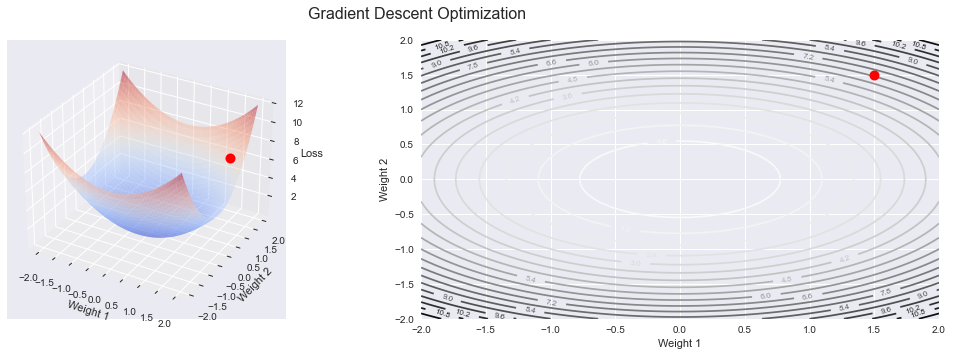

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.cm as cm

class GradientDescentVisualizer:
    def __init__(self):
        self.fig = plt.figure(figsize=(15, 5))
        
        # Create 3D surface plot
        self.ax1 = self.fig.add_subplot(121, projection='3d')
        
        # Create contour plot
        self.ax2 = self.fig.add_subplot(122)
        
        # Setting title for the figure
        self.fig.suptitle('Gradient Descent Optimization', fontsize=16)
        
    def loss_function(self, w1, w2):
        """Simple loss function: f(w1, w2) = w1² + 2w2²"""
        return w1**2 + 2*w2**2
    
    def gradient(self, w1, w2):
        """Compute gradients of the loss function"""
        dw1 = 2*w1
        dw2 = 4*w2
        return np.array([dw1, dw2])
    
    def plot_surface(self):
        # Create the mesh grid
        w1 = np.linspace(-2, 2, 100)
        w2 = np.linspace(-2, 2, 100)
        W1, W2 = np.meshgrid(w1, w2)
        Z = self.loss_function(W1, W2)
        
        # 3D surface plot
        self.ax1.plot_surface(W1, W2, Z, cmap=cm.coolwarm, alpha=0.5)
        self.ax1.set_xlabel('Weight 1')
        self.ax1.set_ylabel('Weight 2')
        self.ax1.set_zlabel('Loss')
        
        # Contour plot
        self.contour = self.ax2.contour(W1, W2, Z, levels=20)
        self.ax2.clabel(self.contour, inline=True, fontsize=8)
        self.ax2.set_xlabel('Weight 1')
        self.ax2.set_ylabel('Weight 2')
        
    def gradient_descent(self, learning_rate=0.1, n_iterations=50):
        # Starting point
        w = np.array([1.5, 1.5])
        path = [w.copy()]
        
        for _ in range(n_iterations):
            grad = self.gradient(w[0], w[1])
            w = w - learning_rate * grad
            path.append(w.copy())
            
        return np.array(path)
    
    def animate(self, frame, path, point_3d, point_2d):
        if frame > 0:
            # Update 3D point
            point_3d.set_data([path[frame, 0]], [path[frame, 1]])
            point_3d.set_3d_properties([self.loss_function(path[frame, 0], path[frame, 1])])
            
            # Update 2D point
            point_2d.set_data([path[frame, 0]], [path[frame, 1]])
            
            # Draw path
            self.ax1.plot(path[frame-1:frame+1, 0], 
                         path[frame-1:frame+1, 1],
                         [self.loss_function(w1, w2) for w1, w2 in path[frame-1:frame+1]], 
                         'r-')
            self.ax2.plot(path[frame-1:frame+1, 0], 
                         path[frame-1:frame+1, 1], 
                         'r-')
        
        return point_3d, point_2d
    
    def visualize(self, learning_rate=0.1, n_iterations=50):
        self.plot_surface()
        path = self.gradient_descent(learning_rate, n_iterations)
        
        # Initialize points
        point_3d = self.ax1.plot([path[0, 0]], [path[0, 1]], 
                                [self.loss_function(path[0, 0], path[0, 1])],
                                'ro', markersize=10)[0]
        point_2d = self.ax2.plot([path[0, 0]], [path[0, 1]], 
                                'ro', markersize=10)[0]
        
        # Create animation
        anim = FuncAnimation(self.fig, 
                           self.animate,
                           frames=len(path),
                           fargs=(path, point_3d, point_2d),
                           interval=100,
                           blit=True)
        
        plt.tight_layout()
        plt.show()
        
        return anim

# Example usage
visualizer = GradientDescentVisualizer()
anim = visualizer.visualize(learning_rate=0.1, n_iterations=50)

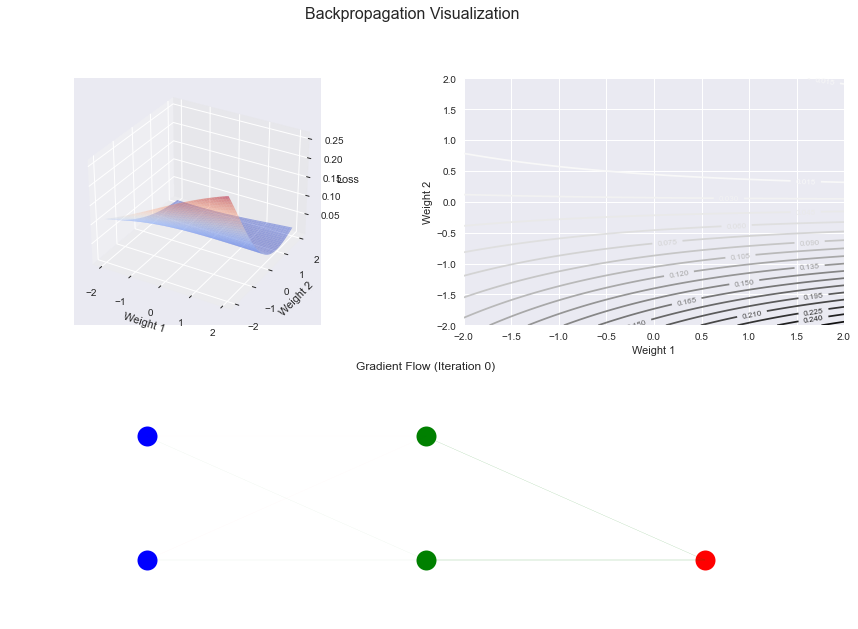

<Figure size 576x396 with 0 Axes>

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.cm as cm

class BackpropVisualizer:
    def __init__(self):
        self.fig = plt.figure(figsize=(15, 10))
        
        # Create main loss surface plot
        self.ax1 = self.fig.add_subplot(221, projection='3d')
        
        # Create contour plot
        self.ax2 = self.fig.add_subplot(222)
        
        # Create gradient flow plot
        self.ax3 = self.fig.add_subplot(212)
        
        # Setting title for the figure
        self.fig.suptitle('Backpropagation Visualization', fontsize=16)
        
        # Initialize network parameters
        self.init_network()
        
    def init_network(self):
        """Initialize a simple network with one hidden layer"""
        self.W1 = np.array([[0.5, -0.5], [0.3, 0.2]])  # 2x2 weight matrix
        self.b1 = np.array([0.1, -0.1])                # biases
        self.W2 = np.array([[0.4], [-0.3]])            # 2x1 weight matrix
        self.b2 = np.array([0.2])                      # output bias
        
    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        """Derivative of sigmoid function"""
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def forward_pass(self, X):
        """Forward pass through the network"""
        # First layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def backward_pass(self, X, y):
        """Backward pass to compute gradients"""
        m = X.shape[0]
        
        # Output layer gradients
        dz2 = self.a2 - y
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0)
        
        # Hidden layer gradients
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.sigmoid_derivative(self.z1)
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0)
        
        return {
            'dW1': dW1, 'db1': db1,
            'dW2': dW2, 'db2': db2
        }
    
    def plot_gradient_flow(self, gradients, iteration):
        """Plot gradient flow through the network"""
        self.ax3.clear()
        
        # Network structure
        layer_sizes = [2, 2, 1]  # Input, hidden, output
        layer_positions = [1, 2, 3]
        
        # Plot nodes
        for i, size in enumerate(layer_sizes):
            for j in range(size):
                self.ax3.plot(layer_positions[i], j, 'o', 
                            color='blue' if i == 0 else 'green' if i == 1 else 'red',
                            markersize=20)
        
        # Plot connections with gradient information
        if i > 0:
            # First layer weights
            for i in range(layer_sizes[0]):
                for j in range(layer_sizes[1]):
                    gradient = gradients['dW1'][i,j]
                    width = abs(gradient) * 3
                    color = 'red' if gradient < 0 else 'green'
                    self.ax3.plot([1, 2], [i, j], '-', 
                                linewidth=width, color=color, alpha=0.6)
            
            # Second layer weights
            for i in range(layer_sizes[1]):
                gradient = gradients['dW2'][i,0]
                width = abs(gradient) * 3
                color = 'red' if gradient < 0 else 'green'
                self.ax3.plot([2, 3], [i, 0], '-', 
                            linewidth=width, color=color, alpha=0.6)
        
        self.ax3.set_xlim(0.5, 3.5)
        self.ax3.set_ylim(-0.5, 1.5)
        self.ax3.set_title(f'Gradient Flow (Iteration {iteration})')
        self.ax3.axis('off')
    
    def loss_surface(self, w1, w2):
        """Compute loss surface for visualization"""
        X = np.array([[0.5, 0.3]])  # Example input
        y = np.array([[0.7]])       # Example target
        
        # Create temporary weights for surface
        self.W1[0,0] = w1
        self.W2[0,0] = w2
        
        # Forward pass
        output = self.forward_pass(X)
        
        # Compute MSE loss
        return np.mean((output - y) ** 2)
    
    def visualize(self, learning_rate=0.1, n_iterations=50):
        # Create mesh for loss surface
        w1 = np.linspace(-2, 2, 100)
        w2 = np.linspace(-2, 2, 100)
        W1, W2 = np.meshgrid(w1, w2)
        Z = np.zeros_like(W1)
        
        for i in range(W1.shape[0]):
            for j in range(W1.shape[1]):
                Z[i,j] = self.loss_surface(W1[i,j], W2[i,j])
        
        # Plot surface
        self.ax1.plot_surface(W1, W2, Z, cmap=cm.coolwarm, alpha=0.5)
        self.ax1.set_xlabel('Weight 1')
        self.ax1.set_ylabel('Weight 2')
        self.ax1.set_zlabel('Loss')
        
        # Plot contour
        contour = self.ax2.contour(W1, W2, Z, levels=20)
        self.ax2.clabel(contour, inline=True, fontsize=8)
        self.ax2.set_xlabel('Weight 1')
        self.ax2.set_ylabel('Weight 2')
        
        # Training data
        X = np.array([[0.5, 0.3]])
        y = np.array([[0.7]])
        
        # Training loop with visualization
        w_history = []
        g_history = []
        
        for i in range(n_iterations):
            # Forward pass
            output = self.forward_pass(X)
            
            # Backward pass
            gradients = self.backward_pass(X, y)
            
            # Update weights
            self.W1 -= learning_rate * gradients['dW1']
            self.b1 -= learning_rate * gradients['db1']
            self.W2 -= learning_rate * gradients['dW2']
            self.b2 -= learning_rate * gradients['db2']
            
            # Store history
            w_history.append([self.W1[0,0], self.W2[0,0]])
            g_history.append(gradients)
            
            # Update visualization
            if i % 5 == 0:  # Update every 5 iterations
                self.plot_gradient_flow(gradients, i)
                plt.pause(0.1)
        
        # Convert history to array
        w_history = np.array(w_history)
        
        # Plot optimization path
        self.ax1.plot(w_history[:,0], w_history[:,1], 
                     [self.loss_surface(w1, w2) for w1, w2 in w_history], 
                     'r.-', linewidth=2)
        self.ax2.plot(w_history[:,0], w_history[:,1], 'r.-', linewidth=2)
        
        plt.tight_layout()
        plt.show()

# Example usage
visualizer = BackpropVisualizer()
visualizer.visualize(learning_rate=0.1, n_iterations=50)

ValueError: operands could not be broadcast together with shapes (20,1) (32,1) 

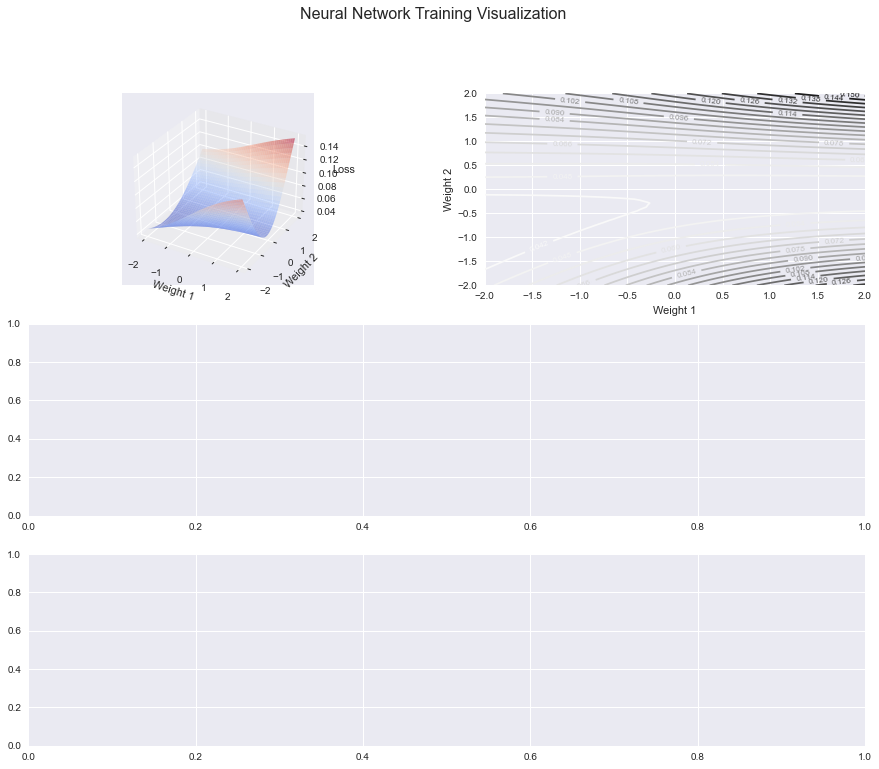

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

class BackpropLossVisualizer:
    def __init__(self):
        # Create figure with subplots
        self.fig = plt.figure(figsize=(15, 12))
        self.gs = self.fig.add_gridspec(3, 2)
        
        # Create 3D surface plot
        self.ax1 = self.fig.add_subplot(self.gs[0, 0], projection='3d')
        
        # Create contour plot
        self.ax2 = self.fig.add_subplot(self.gs[0, 1])
        
        # Create gradient flow plot
        self.ax3 = self.fig.add_subplot(self.gs[1, :])
        
        # Create loss plot
        self.ax4 = self.fig.add_subplot(self.gs[2, :])
        
        # Setting title for the figure
        self.fig.suptitle('Neural Network Training Visualization', fontsize=16)
        
        # Initialize network parameters
        self.init_network()
        
        # Initialize loss history
        self.loss_history = []
        self.val_loss_history = []
        
    def init_network(self):
        """Initialize a simple network with one hidden layer"""
        self.W1 = np.array([[0.5, -0.5], [0.3, 0.2]])  # 2x2 weight matrix
        self.b1 = np.array([0.1, -0.1])                # biases
        self.W2 = np.array([[0.4], [-0.3]])            # 2x1 weight matrix
        self.b2 = np.array([0.2])                      # output bias
        
    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def sigmoid_derivative(self, x):
        """Derivative of sigmoid function"""
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def forward_pass(self, X):
        """Forward pass through the network"""
        batch_size = X.shape[0]
        
        # First layer
        self.z1 = np.dot(X, self.W1) + self.b1.reshape(1, -1)
        self.a1 = self.sigmoid(self.z1)
        
        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2.reshape(1, -1)
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def compute_loss(self, y_pred, y_true):
        """Compute MSE loss"""
        return np.mean((y_pred - y_true) ** 2)
    
def backward_pass(self, X, y, output):
    """Backward pass to compute gradients"""
    batch_size = X.shape[0]
    
    # Output layer gradients
    dz2 = output - y  # Use batch output
    dW2 = (1 / batch_size) * np.dot(self.a1.T, dz2)
    db2 = (1 / batch_size) * np.sum(dz2, axis=0, keepdims=True)
    
    # Hidden layer gradients
    da1 = np.dot(dz2, self.W2.T)
    dz1 = da1 * self.sigmoid_derivative(self.z1)
    dW1 = (1 / batch_size) * np.dot(X.T, dz1)
    db1 = (1 / batch_size) * np.sum(dz1, axis=0)
    
    return {
        'dW1': dW1, 'db1': db1,
        'dW2': dW2, 'db2': db2
    }

 
    
    def plot_loss(self, iteration):
        """Plot training and validation loss"""
        self.ax4.clear()
        
        # Plot training loss
        self.ax4.plot(range(len(self.loss_history)), self.loss_history, 
                     'b-', label='Training Loss', linewidth=2)
        
        # Plot validation loss if available
        if self.val_loss_history:
            self.ax4.plot(range(len(self.val_loss_history)), 
                         self.val_loss_history, 
                         'r--', label='Validation Loss', linewidth=2)
        
        # Add loss values to plot
        if self.loss_history:
            current_loss = self.loss_history[-1]
            self.ax4.text(0.02, 0.98, f'Current Loss: {current_loss:.6f}',
                         transform=self.ax4.transAxes,
                         verticalalignment='top',
                         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        self.ax4.set_xlabel('Iteration')
        self.ax4.set_ylabel('Loss (MSE)')
        self.ax4.set_title('Training Progress')
        self.ax4.grid(True, linestyle='--', alpha=0.7)
        self.ax4.legend(loc='upper right')
        
        if len(self.loss_history) > 1:
            if max(self.loss_history) / (min(self.loss_history) + 1e-10) > 100:
                self.ax4.set_yscale('log')
        
        self.ax4.axvline(x=iteration, color='g', linestyle='--', alpha=0.5)
    
    def plot_gradient_flow(self, gradients, iteration):
        """Plot gradient flow through the network"""
        self.ax3.clear()
        
        # Network structure
        layer_sizes = [2, 2, 1]
        layer_positions = [1, 2, 3]
        
        # Plot nodes
        for i, size in enumerate(layer_sizes):
            for j in range(size):
                self.ax3.plot(layer_positions[i], j, 'o', 
                            color='blue' if i == 0 else 'green' if i == 1 else 'red',
                            markersize=20)
        
        # Plot connections with gradient information
        max_gradient = max(np.max(abs(gradients['dW1'])), np.max(abs(gradients['dW2'])))
        max_gradient = max(max_gradient, 1e-10)  # Avoid division by zero
        
        # First layer weights
        for i in range(layer_sizes[0]):
            for j in range(layer_sizes[1]):
                gradient = gradients['dW1'][i,j]
                width = abs(gradient) / max_gradient * 5
                color = 'red' if gradient < 0 else 'green'
                self.ax3.plot([1, 2], [i, j], '-', 
                            linewidth=width, color=color, alpha=0.6)
        
        # Second layer weights
        for i in range(layer_sizes[1]):
            gradient = gradients['dW2'][i,0]
            width = abs(gradient) / max_gradient * 5
            color = 'red' if gradient < 0 else 'green'
            self.ax3.plot([2, 3], [i, 0], '-', 
                         linewidth=width, color=color, alpha=0.6)
        
        self.ax3.set_xlim(0.5, 3.5)
        self.ax3.set_ylim(-0.5, 1.5)
        self.ax3.set_title(f'Gradient Flow (Iteration {iteration})')
        self.ax3.axis('off')
    
    def visualize(self, learning_rate=0.1, n_iterations=50):
        # Generate synthetic data
        np.random.seed(42)
        X = np.random.rand(100, 2)  # 100 samples, 2 features
        y = (X[:, 0:1] + X[:, 1:2])/2  # Target is average of features
        
        # Split into training and validation sets
        train_size = 80
        X_train = X[:train_size]
        y_train = y[:train_size]
        X_val = X[train_size:]
        y_val = y[train_size:]
        
        # Create and plot loss surface
        w1 = np.linspace(-2, 2, 50)
        w2 = np.linspace(-2, 2, 50)
        W1, W2 = np.meshgrid(w1, w2)
        Z = np.zeros_like(W1)
        
        # Compute loss surface
        for i in range(W1.shape[0]):
            for j in range(W1.shape[1]):
                self.W1[0,0] = W1[i,j]
                self.W2[0,0] = W2[i,j]
                output = self.forward_pass(X_train)
                Z[i,j] = self.compute_loss(output, y_train)
        
        # Plot surface
        self.ax1.plot_surface(W1, W2, Z, cmap=cm.coolwarm, alpha=0.5)
        self.ax1.set_xlabel('Weight 1')
        self.ax1.set_ylabel('Weight 2')
        self.ax1.set_zlabel('Loss')
        
        # Plot contour
        contour = self.ax2.contour(W1, W2, Z, levels=20)
        self.ax2.clabel(contour, inline=True, fontsize=8)
        self.ax2.set_xlabel('Weight 1')
        self.ax2.set_ylabel('Weight 2')
        
        # Training loop with visualization
        w_history = []
        batch_size = 32
        
        for i in range(n_iterations):
            # Mini-batch selection
            idx = np.random.randint(0, train_size, batch_size)
            X_batch = X_train[idx]
            y_batch = y_train[idx]
            
            # Forward pass
            output = self.forward_pass(X_batch)
            loss = self.compute_loss(output, y_batch)
            self.loss_history.append(loss)
            
            # Compute validation loss
            val_output = self.forward_pass(X_val)
            val_loss = self.compute_loss(val_output, y_val)
            self.val_loss_history.append(val_loss)
            
            # Backward pass
            gradients = self.backward_pass(X_batch, y_batch)
            
            # Update weights
            self.W1 -= learning_rate * gradients['dW1']
            self.b1 -= learning_rate * gradients['db1']
            self.W2 -= learning_rate * gradients['dW2']
            self.b2 -= learning_rate * gradients['db2'].flatten()
            
            # Store weight history
            w_history.append([self.W1[0,0], self.W2[0,0]])
            
            # Update visualizations
            if i % 2 == 0:  # Update every 2 iterations
                self.plot_gradient_flow(gradients, i)
                self.plot_loss(i)
                plt.pause(0.1)
        
        # Plot final optimization path
        w_history = np.array(w_history)
        self.ax1.plot(w_history[:,0], w_history[:,1], 
                     [self.compute_loss(self.forward_pass(X_train), y_train) 
                      for w1, w2 in w_history], 
                     'r.-', linewidth=2)
        self.ax2.plot(w_history[:,0], w_history[:,1], 'r.-', linewidth=2)
        
        plt.tight_layout()
        plt.show()

# Example usage
visualizer = BackpropLossVisualizer()
visualizer.visualize(learning_rate=0.1, n_iterations=100)

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

class BackpropLossVisualizer:
    def __init__(self):
        # Create figure with subplots
        self.fig = plt.figure(figsize=(15, 12))
        self.gs = self.fig.add_gridspec(3, 2)
        
        # Create 3D surface plot
        self.ax1 = self.fig.add_subplot(self.gs[0, 0], projection='3d')
        
        # Create contour plot
        self.ax2 = self.fig.add_subplot(self.gs[0, 1])
        
        # Create gradient flow plot
        self.ax3 = self.fig.add_subplot(self.gs[1, :])
        
        # Create loss plot
        self.ax4 = self.fig.add_subplot(self.gs[2, :])
        
        # Setting title for the figure
        self.fig.suptitle('Neural Network Training Visualization', fontsize=16)
        
        # Initialize network parameters
        self.init_network()
        
        # Initialize loss history
        self.loss_history = []
        self.val_loss_history = []
        
    def init_network(self):
        """Initialize a simple network with one hidden layer"""
        self.W1 = np.array([[0.5, -0.5], [0.3, 0.2]])  # 2x2 weight matrix
        self.b1 = np.array([0.1, -0.1])                # biases
        self.W2 = np.array([[0.4], [-0.3]])            # 2x1 weight matrix
        self.b2 = np.array([0.2])                      # output bias
        
    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def sigmoid_derivative(self, x):
        """Derivative of sigmoid function"""
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def forward_pass(self, X):
        """Forward pass through the network"""
        # First layer
        self.z1 = np.dot(X, self.W1) + self.b1.reshape(1, -1)
        self.a1 = self.sigmoid(self.z1)
        
        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2.reshape(1, -1)
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def compute_loss(self, y_pred, y_true):
        """Compute MSE loss"""
        return np.mean((y_pred - y_true) ** 2)
    
    def backward_pass(self, X, y, output):
        """Backward pass to compute gradients"""
        batch_size = X.shape[0]
        
        # Output layer gradients
        dz2 = output - y
        dW2 = (1 / batch_size) * np.dot(self.a1.T, dz2)
        db2 = (1 / batch_size) * np.sum(dz2, axis=0, keepdims=True)
        
        # Hidden layer gradients
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.sigmoid_derivative(self.z1)
        dW1 = (1 / batch_size) * np.dot(X.T, dz1)
        db1 = (1 / batch_size) * np.sum(dz1, axis=0)
        
        return {
            'dW1': dW1, 'db1': db1,
            'dW2': dW2, 'db2': db2
        }
    
    def plot_loss(self, iteration):
        """Plot training and validation loss"""
        self.ax4.clear()
        
        # Plot training loss
        self.ax4.plot(range(len(self.loss_history)), self.loss_history, 
                      'b-', label='Training Loss', linewidth=2)
        
        # Plot validation loss if available
        if self.val_loss_history:
            self.ax4.plot(range(len(self.val_loss_history)), 
                          self.val_loss_history, 
                          'r--', label='Validation Loss', linewidth=2)
        
        # Add loss values to plot
        if self.loss_history:
            current_loss = self.loss_history[-1]
            self.ax4.text(0.02, 0.98, f'Current Loss: {current_loss:.6f}',
                          transform=self.ax4.transAxes,
                          verticalalignment='top',
                          bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        self.ax4.set_xlabel('Iteration')
        self.ax4.set_ylabel('Loss (MSE)')
        self.ax4.set_title('Training Progress')
        self.ax4.grid(True, linestyle='--', alpha=0.7)
        self.ax4.legend(loc='upper right')
        
        if len(self.loss_history) > 1:
            if max(self.loss_history) / (min(self.loss_history) + 1e-10) > 100:
                self.ax4.set_yscale('log')
        
        self.ax4.axvline(x=iteration, color='g', linestyle='--', alpha=0.5)
    
    def plot_gradient_flow(self, gradients, iteration):
        """Plot gradient flow through the network"""
        self.ax3.clear()
        
        # Network structure
        layer_sizes = [2, 2, 1]
        layer_positions = [1, 2, 3]
        
        # Plot nodes
        for i, size in enumerate(layer_sizes):
            for j in range(size):
                self.ax3.plot(layer_positions[i], j, 'o', 
                              color='blue' if i == 0 else 'green' if i == 1 else 'red',
                              markersize=20)
        
        # Plot connections with gradient information
        max_gradient = max(np.max(abs(gradients['dW1'])), np.max(abs(gradients['dW2'])))
        max_gradient = max(max_gradient, 1e-10)  # Avoid division by zero
        
        # First layer weights
        for i in range(layer_sizes[0]):
            for j in range(layer_sizes[1]):
                gradient = gradients['dW1'][i, j]
                width = abs(gradient) / max_gradient * 5
                color = 'red' if gradient < 0 else 'green'
                self.ax3.plot([1, 2], [i, j], '-', 
                              linewidth=width, color=color, alpha=0.6)
        
        # Second layer weights
        for i in range(layer_sizes[1]):
            gradient = gradients['dW2'][i, 0]
            width = abs(gradient) / max_gradient * 5
            color = 'red' if gradient < 0 else 'green'
            self.ax3.plot([2, 3], [i, 0], '-', 
                          linewidth=width, color=color, alpha=0.6)
        
        self.ax3.set_xlim(0.5, 3.5)
        self.ax3.set_ylim(-0.5, 1.5)
        self.ax3.set_title(f'Gradient Flow (Iteration {iteration})')
        self.ax3.axis('off')
    
    def visualize(self, learning_rate=0.1, n_iterations=50):
        # Generate synthetic data
        np.random.seed(42)
        X = np.random.rand(100, 2)  # 100 samples, 2 features
        y = (X[:, 0:1] + X[:, 1:2]) / 2  # Target is average of features
        
        # Split into training and validation sets
        train_size = 80
        X_train = X[:train_size]
        y_train = y[:train_size]
        X_val = X[train_size:]
        y_val = y[train_size:]
        
        # Create and plot loss surface
        w1 = np.linspace(-2, 2, 50)
        w2 = np.linspace(-2, 2, 50)
        W1, W2 = np.meshgrid(w1, w2)
        Z = np.zeros_like(W1)
        
        # Compute loss surface
        for i in range(W1.shape[0]):
            for j in range(W1.shape[1]):
                self.W1[0, 0] = W1[i, j]
                self.W2[0, 0] = W2[i, j]
                output = self.forward_pass(X_train)
                Z[i, j] = self.compute_loss(output, y_train)
        
        # Plot surface
        self.ax1.plot_surface(W1, W2, Z, cmap=cm.coolwarm, alpha=0.5)
        self.ax1.set_xlabel('Weight 1')
        self.ax1.set_ylabel('Weight 2')
        self.ax1.set_zlabel('Loss')
        
        # Plot contour
        contour = self.ax2.contour(W1, W2, Z, levels=20)
        self.ax2.clabel(contour, inline=True, fontsize=8)
        self.ax2.set_xlabel('Weight 1')
        self.ax2.set_ylabel('Weight 2')
        
        # Training loop with visualization
        w_history = []
        batch_size = 32
        
        for i in range(n_iterations):
            # Mini-batch selection
            idx = np.random.randint(0, train_size, batch_size)
            X_batch = X_train[idx]
            y_batch = y_train[idx]
            
            # Forward pass for the batch
            output = self.forward_pass(X_batch)
            loss = self.compute_loss(output, y_batch)
            self.loss_history.append(loss)
            
            # Validation loss computation
            val_output = self.forward_pass(X_val)
            val_loss = self.compute_loss(val_output, y_val)
            self.val_loss_history.append(val_loss)
            
            # Backward pass for the batch
            gradients = self.backward_pass(X_batch, y_batch, output)
            
            # Update weights
            self.W1 -= learning_rate * gradients['dW1']
            self.b1 -= learning_rate * gradients['db1']
            self.W2 -= learning_rate * gradients['dW2']
            self.b2 -= learning_rate * gradients['db2'].flatten()
            
            # Visualization
            if i % 2 == 0:
                self.plot_gradient_flow(gradients, i)
                self.plot_loss(i)
                plt.pause(0.1)


In [39]:
def visualize(self, learning_rate=0.1, n_iterations=50):
    # Generate synthetic data
    np.random.seed(42)
    X = np.random.rand(100, 2)  # 100 samples, 2 features
    y = (X[:, 0:1] + X[:, 1:2]) / 2  # Target is the average of features
    
    # Split into training and validation sets
    train_size = 80
    X_train = X[:train_size]
    y_train = y[:train_size]
    X_val = X[train_size:]
    y_val = y[train_size:]
    
    # Initialize weight history for visualization
    w_history = []
    batch_size = 32

    for i in range(n_iterations):  # Now 'n_iterations' is in scope
        # Mini-batch selection
        idx = np.random.randint(0, train_size, batch_size)
        X_batch = X_train[idx]
        y_batch = y_train[idx]
        
        # Forward pass
        output = self.forward_pass(X_batch)
        loss = self.compute_loss(output, y_batch)
        self.loss_history.append(loss)
        
        # Compute validation loss
        val_output = self.forward_pass(X_val)
        val_loss = self.compute_loss(val_output, y_val)
        self.val_loss_history.append(val_loss)
        
        # Backward pass
        gradients = self.backward_pass(X_batch, y_batch)
        
        # Update weights
        self.W1 -= learning_rate * gradients['dW1']
        self.b1 -= learning_rate * gradients['db1']
        self.W2 -= learning_rate * gradients['dW2']
        self.b2 -= learning_rate * gradients['db2'].flatten()
        
        # Store weight history for visualization
        w_history.append([self.W1[0, 0], self.W2[0, 0]])
        
        # Update visualizations
        if i % 2 == 0:  # Update every 2 iterations
            self.plot_gradient_flow(gradients, i)
            self.plot_loss(i)
            plt.pause(0.1)

    # Plot final optimization path
    w_history = np.array(w_history)
    self.ax1.plot(w_history[:, 0], w_history[:, 1], 
                  [self.compute_loss(self.forward_pass(X_train), y_train) 
                   for _ in w_history], 
                  'r.-', linewidth=2)
    self.ax2.plot(w_history[:, 0], w_history[:, 1], 'r.-', linewidth=2)
    
    # Adjust layout and show final plots
    plt.tight_layout()
    plt.show()


In [44]:
if __name__ == "__main__":
    visualizer = BackpropLossVisualizer()
    visualizer.visualize(learning_rate=0.1, n_iterations=100)


AttributeError: 'BackpropLossVisualizer' object has no attribute 'plot_gradient_flow'